In [6]:
import sys

sys.path.append("c:\\Users\\robin\\Documents\\HyperBrain")
sys.path.append("c:\\Users\\robin\\Documents\\HyperBrain\\source")

In [42]:
import torch
from source.visualization.evaluation_visualization import plot_precision_vs_threshold
from source.miscellaneous.evaluation import evaluate_test_image_pair, read_deformation, read_model_evaluation_metrics

In [9]:
deformation = read_deformation()

In [36]:
loftr_indoor_matches_image_1 = torch.load("../../models/baseline/loftr_indoor_matches_image_1.pt")
loftr_indoor_matches_image_2 = torch.load("../../models/baseline/loftr_indoor_matches_image_2.pt")
loftr_indoor_matches_confidence = torch.load("../../models/baseline/loftr_indoor_matches_confidence.pt")

loftr_outdoor_matches_image_1 = torch.load("../../models/baseline/loftr_outdoor_matches_image_1.pt")
loftr_outdoor_matches_image_2 = torch.load("../../models/baseline/loftr_outdoor_matches_image_2.pt")
loftr_outdoor_matches_confidence = torch.load("../../models/baseline/loftr_outdoor_matches_confidence.pt")

In [37]:
confidence_threshold_loftr = 0.8

loftr_indoor_matches_mask = loftr_indoor_matches_confidence > confidence_threshold_loftr
loftr_outdoor_matches_mask = loftr_outdoor_matches_confidence > confidence_threshold_loftr

loftr_indoor_matches_image_1 = loftr_indoor_matches_image_1[loftr_indoor_matches_mask]
loftr_indoor_matches_image_2 = loftr_indoor_matches_image_2[loftr_indoor_matches_mask]

loftr_outdoor_matches_image_1 = loftr_outdoor_matches_image_1[loftr_outdoor_matches_mask]
loftr_outdoor_matches_image_2 = loftr_outdoor_matches_image_2[loftr_outdoor_matches_mask]

In [38]:
(number_of_matches,
 average_distance,
 match_precision,
 auc,matches_per_patch,
 entropy) = evaluate_test_image_pair(loftr_indoor_matches_image_1, loftr_indoor_matches_image_2, deformation)

In [64]:
evaluation_metrics = read_model_evaluation_metrics(str("63"))

In [65]:
evaluation_metrics["match_precision"] = {float(key): value for key, value in evaluation_metrics["match_precision"].items()}


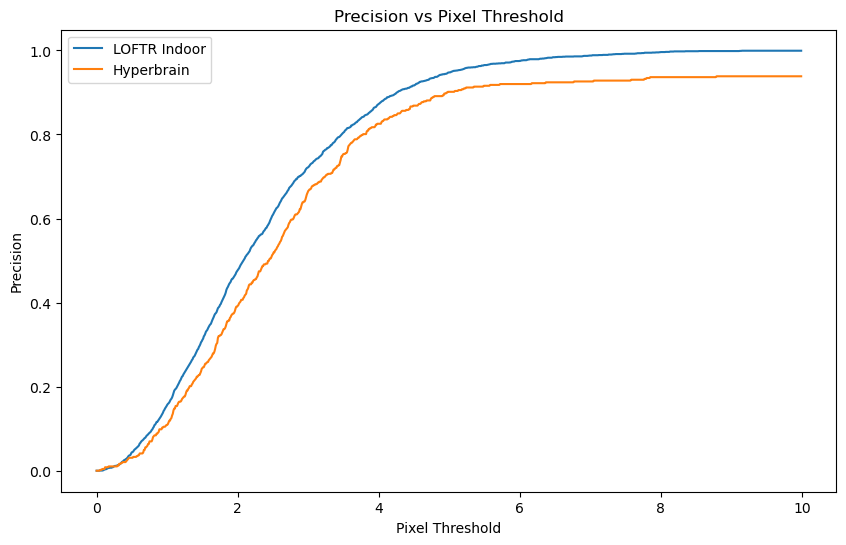

In [66]:
plot_precision_vs_threshold(match_precision, evaluation_metrics["match_precision"], labels=["LOFTR Indoor", "Hyperbrain"])